 ╔══<i><b>&nbsp;Alai-DeepLearning&nbsp;</b></i>══════════════════════════════════╗

###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 6. MLP_basis**
# Homework 1. EMNIST 학습하기 ( Multi classification problem)

## 8_Tensorflow을 이용한 Network Training


### _Objective_
* MNIST 보다 Class 수가 많아진, Extended MNIST을 학습시켜 봅니다.
 
╚═══════════════════════════════════════════════╝



In [1]:
# 우선 실행해 주세요 
!pip install tensorboardcolab
!pip install emnist
import tensorboardcolab

from emnist import extract_training_samples
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf
import random
from tqdm import tqdm

Using TensorFlow backend.


## 문제 1.EMNIST 학습시키기 

EMNIST는 27개의 알파벳으로 이루어진 글자 데이터셋입니다.<br>
MNIST보다 훨신 더 많은 클래스로 이루어져 있습니다.<br>



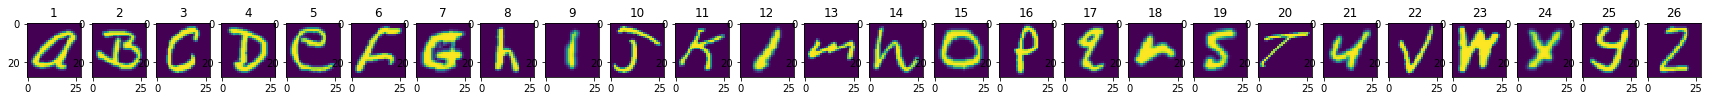

In [2]:
# 데이터를 시각화 합니다.
images, labels = extract_training_samples('letters')

n_unique = len(set(labels))
fig, axes = plt.subplots(1, n_unique)
fig.set_size_inches(30,10)
for ind in range(1,n_unique+1):
    ax = axes[ind-1]
    sample_index = np.where(labels == ind)[0][0]
    ax.imshow(images[sample_index])
    ax.set_title(str(ind))
              
plt.show()

In [3]:
print(images.shape)

(124800, 28, 28)


In [4]:
extract_training_samples

<function emnist.extract_training_samples>

아래와 같이 학습 데이터셋, 평가데이터셋, validation 데이터셋으로 나뉘어져 있습니다.<br>

In [5]:
# Train-Test Dataset Split
np.random.seed(1)
indices = np.arange(len(images))
np.random.shuffle(indices)

test_indices = indices[:len(images)//10]
valid_indices = indices[len(images)//10:2*len(images)//10]
train_indices = indices[2*len(images)//10:]

test_images, test_labels = images[test_indices], labels[test_indices]
valid_images, valid_labels = images[valid_indices], labels[valid_indices]
train_images, train_labels = images[train_indices], labels[train_indices]

print("test 데이터 셋 수 : ",len(test_indices))
print("validation 데이터 셋 수 : ",len(valid_indices))
print("train 데이터 셋 수 : ",len(train_indices))

test 데이터 셋 수 :  12480
validation 데이터 셋 수 :  12480
train 데이터 셋 수 :  99840


### one hot label로 변환하기(train)

In [0]:
len_ = len(train_images)
train_one_hot_label = np.zeros([len_, 27], dtype=np.float32)

for idx in range(0,len_):
    number = train_labels[idx]
    train_one_hot_label[idx, number] = 1

In [7]:
train_one_hot_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### one hot label 검증(train)

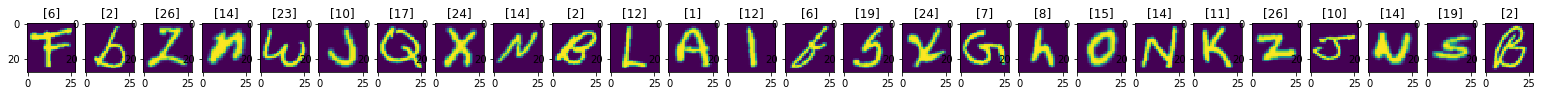

In [8]:
n_unique = len(set(labels))
fig, axes = plt.subplots(1, n_unique)
fig.set_size_inches(27,1)

for idx in range(0, 26):
    number = 0
    for i in range(0,26) :
        number = np.where(train_one_hot_label[idx] == 1)
    ax = axes[idx]
    ax.imshow(train_images[idx])
    ax.set_title(str(number[0]))
plt.show()

In [0]:
# #이건 왜 안될까..
# train_one_hot_label = tf.cast(tf.one_hot(indices=tf.cast(train_labels, tf.uint8), depth=27), np.float32)
# train_one_hot_label

### one hot label로 변환하기(validation)

In [0]:
len_ = len(valid_images)
valid_one_hot_label = np.zeros([len_, 27], dtype=np.float32)

for idx in range(0,len_):
    number = valid_labels[idx]
    valid_one_hot_label[idx, number] = 1

### one hot label 검증(validation)

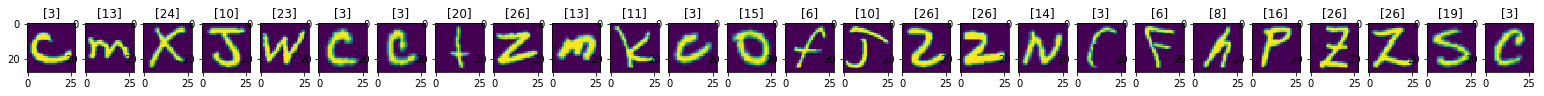

In [11]:
n_unique = len(set(labels))
fig, axes = plt.subplots(1, n_unique)
fig.set_size_inches(27,1)

for idx in range(0, 26):
    number = 0
    for i in range(0,26) :
        number = np.where(valid_one_hot_label[idx] == 1)
    ax = axes[idx]
    ax.imshow(valid_images[idx])
    ax.set_title(str(number[0]))
plt.show()

### 목표

> Test 데이터셋의 정확도가 **90%**가 넘는 Classification 모델을 구현해 주세요

#### 답안지 입력란
* 아래에 답을 서술하여 주세요

### 모델 학습

In [12]:
num_inputs = 28*28 # EMNIST Input size

num_hidden1 = 1600
num_hidden2 = 1600
num_hidden3 = 1600
num_hidden4 = 1600

# model01 : hidden layer = 10, size= 3200부터 100까지 --> 10%
# model02 : hidden layer = 3, size= 300, 300, 300 -> 10%
# model03 : hidden layer = 3, size= 1600, 1600, 1600, lr=0.001, epoch=200, 8분 --> 70.44%
# model04 : hidden layer = 3, size= 3200, 3200, 3200, lr=0.001, epoch=400, 28분--> 82.58%
# model05 : hidden layer = 4, size= 3200, 3200, 3200, 3200 lr=0.001, epoch=1000,  1시간 30분 --> 89.89%, testset는 75% 밖에 안나옴.(Overfitting됨)
# model06 : hidden layer = 3, size= 800, 800, 800, lr=0.003, epoch=2000, 17분 -> 81.96%, testset는 78.16%. Overfitting은 개선되었으나, 정확도는 수준미달임
# model07 : hidden layer = 4, size= 400, 200, 100, 50, lr=0.003, epoch=4000 - > 50%정도 학습에서 정답율 20%밖에 안되서 중단함
# model08 : hidden layer = 4, size= 100, 400, 800, 1600, lr=0.003, epoch=4000 - > 5%대에서 정답율 4%라 중단함
# model09 : hidden layer = 4, size= 800, 800, 1600, 1600, lr=0.003, epoch=4000 - > 0%
# model10 : hidden layer = 4, size= 1600, 1600, 1600, 1600, lr=0.003, epoch=4000 - >  잘안됨
# model11 : hidden layer = 4, size= 1600, 1600, 1600, 1600, lr=0.001, epoch=4000, 1시간 50분 - >  95.14%  --> trainset 78.47%

num_outputs = 27 # The number of Label : 27

graph = tf.Graph()
with graph.as_default():
    # Data를 받아오는 placeholder
    x = tf.placeholder(tf.float32, shape=(None, num_inputs), name='x')
    labels = tf.placeholder(tf.float32, shape=(None,num_outputs), name='labels')
    learning_rate = tf.placeholder_with_default(0.001, shape=(), name='learning_rate')
    he_init = tf.initializers.he_normal()
    
    a1 = tf.layers.Dense(num_hidden1, activation= tf.nn.relu, kernel_initializer=he_init, use_bias=True, name='hidden1')(x) ## Class. magic method!
    a2 = tf.layers.Dense(num_hidden2, activation= tf.nn.relu, kernel_initializer=he_init, use_bias=True, name='hidden2')(a1)
    a3 = tf.layers.Dense(num_hidden3, activation= tf.nn.relu, kernel_initializer=he_init, use_bias=True, name='hidden3')(a2)
    a4 = tf.layers.Dense(num_hidden4, activation= tf.nn.relu, kernel_initializer=he_init, use_bias=True, name='hidden4')(a3)

    # defulat activation is None
    logits = tf.layers.Dense(num_outputs, activation=None, name='output')(a4)
    logits = tf.identity(logits, name='logits')
    
    ## pred for show graph
    pred1 = tf.layers.Dense(num_outputs, activation='sigmoid', name='pred1')(logits)
    pred = tf.identity(pred1, name='pred')
    
    ## loss
    loss = tf.losses.softmax_cross_entropy(onehot_labels=labels, logits=logits) # logits과 같은 shape를 return한다. 
    #loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = labels, logits = logits))
    #tf.add_to_collection(loss, tf.GraphKeys.LOSSES)
    
    # acc
    logits_cls = tf.argmax(logits, axis=1)
    ys_cls = tf.argmax(labels, axis=1, name='ys_cls')
    acc = tf.reduce_mean(tf.cast(tf.equal(ys_cls, logits_cls), tf.float32))

    # 학습
    train_op = (tf.train
         .GradientDescentOptimizer(learning_rate=learning_rate)
         .minimize(loss))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [13]:
n_epochs = 4000   # 총 학습 횟수
# batch_size = 40 # 한번의 Loss를 계산할 때 쓰는 데이터의 갯수

tf.reset_default_graph()

def print_plot(image, logits_cls) :
    fig, axes = plt.subplots(1, 10)
    fig.set_size_inches(10 ,10)
    for idx in range(10):
        ax = axes[idx]
        ax.imshow(image[idx])
        ax.set_title(str(logits_cls[idx]))  
    plt.show()
    
def show_prediction(images, pred, loss, acc, logits, logits_cls, epoch) :
    print("\n\n---------------- {} epoch : train진행중, loss = {:.2}, acc = {:3.2f}% ------------------".format(epoch, loss, acc*100))
    #print("pred value = {}".format(pred[0]))
    #print("logits = {}".format(logits[0]))
    #print("logits_cls = {}".format(logits_cls[0:10]))
    print_plot(images, logits_cls)
        
with graph.as_default():
    sess = tf.Session(graph=graph)
    sess.run(tf.global_variables_initializer())
    
    # tensor 가져오기
    labels = graph.get_tensor_by_name('labels:0')
    logits = graph.get_tensor_by_name('logits:0')
    pred = graph.get_tensor_by_name('pred:0')
    
    # 학습시킬 Weights의 리스트 가져오기
    weights = graph.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)
    
    # 신경망의 손실함수 가져오기
    loss = graph.get_collection(tf.GraphKeys.LOSSES)[0]

    # train set
    train_feed_dict = {x: train_images.reshape(-1,784), labels: train_one_hot_label} # None, 784
    train_fetches = [train_op, loss, pred, acc, logits, logits_cls]
    
    # validation set
    val_feed_dict = {x:valid_images.reshape(-1,784), labels: valid_one_hot_label} # None, 784
    val_fetches = [loss, acc]

    train_acc_list = []
    train_loss_list = []
    val_acc_list = []
    val_loss_list = []
    
    print("-----------------train set image 검증 -------------------- \n")
    train_cls = np.argmax(train_one_hot_label, axis=1)
    print_plot(train_images, train_cls)
    
    ##############################################################################################
    
    for epoch in tqdm(range(n_epochs)):
        _, loss_, pred_, acc_, logits_, logits_cls_= sess.run(train_fetches, train_feed_dict)
        train_acc_list.append(acc_)
        train_loss_list.append(loss_)
        if epoch % 10 == 0 :
            show_prediction(train_images, pred_, loss_, acc_, logits_, logits_cls_, epoch)
            val_loss_, val_acc_ = sess.run(val_fetches, val_feed_dict) # operation이라 None나옴
            val_acc_list.append(val_acc_)
            val_loss_list.append(val_loss_)
        # if acc_ > 0.9 : # 문제 조건
        #     break

Output hidden; open in https://colab.research.google.com to view.

In [17]:
print("train accuracy : " + str(train_acc_list[-1]*100))

train accuracy : 95.14923691749573


Text(0.5, 1.0, 'loss')

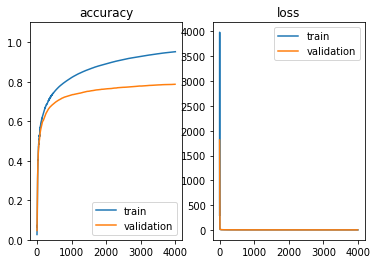

In [18]:
fig, axes = plt.subplots(1, 2) # 1행에 2개짜리 
# ax1 = plt.add_subplot(1,2,1)
# ax1.plot
# ax2 = plt.add_subplot(1,2,2)

# ㅡㅡㅡㅡㅡㅡㅡ figure
# ㅣ■     ■     ㅣ   
# ㅣax      ax    ㅣ
# ㅡㅡㅡㅡㅡㅡㅡㅡ

len_ = len(train_acc_list)
axes[0].plot(range(len_), train_acc_list, label='train')
axes[0].plot(range(0,len_,10), val_acc_list, label='validation')
axes[0].legend()
axes[0].set_ylim(0.0, 1.1)
axes[0].set_title('accuracy')

axes[1].plot(range(len_), train_loss_list, label='train')
axes[1].plot(range(0,len_,10), val_loss_list, label='validation')
axes[1].legend()
axes[1].set_title('loss')

### 결과확인

testimage accuracy : 78.47%


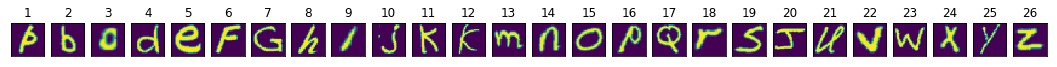

In [19]:
logit_values = sess.run(logits, feed_dict={ x:test_images.reshape(-1,784) }) # test_images

predictions = logit_values.argmax(axis=1)
acc = np.mean(np.equal(predictions, test_labels))
print("testimage accuracy : {:.2f}%".format(acc*100))
    
fig = plt.figure(figsize=(20,20))
rows = 1
cnt = 1
for idx, (image, prediction) in enumerate(zip(test_images, predictions)):
    #print("pre = {}, cnt = {}".format(prediction, cnt))
    if prediction == cnt :
        ax = fig.add_subplot(rows, 28, cnt+1) 
        ax.set_xticks([])
        ax.set_yticks([])    
        ax.set_title(prediction)
        ax.imshow(image)
        cnt += 1
        if cnt % 10 == 10 :
            print("\n")
            rows+=1
    if cnt == 27 :
        break

#  

<hr>
<div style = "background-image: url('https://algorithmai.io/static/media/logo.665798c4.png');background-repeat: no-repeat; background-position: right; background-size: 220px 40px; padding : 5px 10px 5px 5px;">
    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/04/17
</div>
<hr>